In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
root_path = '/workspaces/Tracking-Gazes-on-Museum-Pieces-Data-Plus'
file_path = os.path.join(root_path, "all_gaze.csv")
gaze_df_orig = pd.read_csv(file_path, compression="gzip")
display(gaze_df_orig.head())
print(gaze_df_orig.shape)

,index,section id,recording id,timestamp [ns],gaze x [px],gaze y [px],worn,fixation id,blink id,timestamp [ns]_for_grouping,ref_center_x,ref_center_y,ref_coordinates,tag,ts,increment_marker,seconds_id,participant_folder,art_piece,participant_id
0,478,4f973aa1-3407-40dd-aa0b-6f34d8f836a0,5148957b-9cd4-4fab-be5d-dc48f5aa0bb0,2400.039,528.068,559.410,1.0,NaN,NaN,1638871076374815336,504,559,"(504, 559)",f chest,2021-12-07 04:57:56.374815,0 days 00:00:00,0,2021_01bmf,Truscan Couple Statue,1
1,486,4f973aa1-3407-40dd-aa0b-6f34d8f836a0,5148957b-9cd4-4fab-be5d-dc48f5aa0bb0,2440.103,523.121,562.133,1.0,NaN,NaN,1638871076414879336,499,562,"(499, 562)",f chest,2021-12-07 04:57:56.414879,0 days 00:00:00.040064,0,2021_01bmf,Truscan Couple Statue,1
2,491,4f973aa1-3407-40dd-aa0b-6f34d8f836a0,5148957b-9cd4-4fab-be5d-dc48f5aa0bb0,2463.981,517.125,571.039,1.0,NaN,NaN,1638871076438757336,493,571,"(493, 571)",f chest,2021-12-07 04:57:56.438757,0 days 00:00:00.063942,0,2021_01bmf,Truscan Couple Statue,1
3,498,4f973aa1-3407-40dd-aa0b-6f34d8f836a0,5148957b-9cd4-4fab-be5d-dc48f5aa0bb0,2500.025,523.048,572.285,1.0,NaN,NaN,1638871076474801336,499,573,"(499, 573)",f chest,2021-12-07 04:57:56.474801,0 days 00:00:00.099986,0,2021_01bmf,Truscan Couple Statue,1
4,504,4f973aa1-3407-40dd-aa0b-6f34d8f836a0,5148957b-9cd4-4fab-be5d-dc48f5aa0bb0,2531.981,526.182,560.995,1.0,NaN,NaN,1638871076506757336,502,561,"(502, 561)",f chest,2021-12-07 04:57:56.506757,0 days 00:00:00.131942,0,2021_01bmf,Truscan Couple Statue,1


(89809, 20)


### Pre-processing

In [2]:
def modify(df): 
    """
    April's code
    """
    df.reset_index(inplace=True, drop=True)
    df['ts'] = pd.to_datetime(df['ts'])
    baseline = df["ts"][0]

    df["increment_marker"] = df["ts"] - baseline
    df["next time"] = df["ts"].shift(-1)
    df["next x"] = df["gaze x [px]"].shift(-1)
    df["next y"] = df["gaze y [px]"].shift(-1)
    df = df[:-1].copy()
    return df

gaze_df = gaze_df_orig.groupby(["participant_folder"]).apply(modify).reset_index(drop=True)
gaze_df["duration"] = gaze_df["next time"] - gaze_df["ts"]
display(gaze_df.head())

,index,section id,recording id,timestamp [ns],gaze x [px],gaze y [px],worn,fixation id,blink id,timestamp [ns]_for_grouping,...,ts,increment_marker,seconds_id,participant_folder,art_piece,participant_id,next time,next x,next y,duration
0,478,4f973aa1-3407-40dd-aa0b-6f34d8f836a0,5148957b-9cd4-4fab-be5d-dc48f5aa0bb0,2400.039,528.068,559.410,1.0,NaN,NaN,1638871076374815336,...,2021-12-07 04:57:56.374815,0 days 00:00:00,0,2021_01bmf,Truscan Couple Statue,1,2021-12-07 04:57:56.414879,523.121,562.133,0 days 00:00:00.040064
1,486,4f973aa1-3407-40dd-aa0b-6f34d8f836a0,5148957b-9cd4-4fab-be5d-dc48f5aa0bb0,2440.103,523.121,562.133,1.0,NaN,NaN,1638871076414879336,...,2021-12-07 04:57:56.414879,0 days 00:00:00.040064,0,2021_01bmf,Truscan Couple Statue,1,2021-12-07 04:57:56.438757,517.125,571.039,0 days 00:00:00.023878
2,491,4f973aa1-3407-40dd-aa0b-6f34d8f836a0,5148957b-9cd4-4fab-be5d-dc48f5aa0bb0,2463.981,517.125,571.039,1.0,NaN,NaN,1638871076438757336,...,2021-12-07 04:57:56.438757,0 days 00:00:00.063942,0,2021_01bmf,Truscan Couple Statue,1,2021-12-07 04:57:56.474801,523.048,572.285,0 days 00:00:00.036044
3,498,4f973aa1-3407-40dd-aa0b-6f34d8f836a0,5148957b-9cd4-4fab-be5d-dc48f5aa0bb0,2500.025,523.048,572.285,1.0,NaN,NaN,1638871076474801336,...,2021-12-07 04:57:56.474801,0 days 00:00:00.099986,0,2021_01bmf,Truscan Couple Statue,1,2021-12-07 04:57:56.506757,526.182,560.995,0 days 00:00:00.031956
4,504,4f973aa1-3407-40dd-aa0b-6f34d8f836a0,5148957b-9cd4-4fab-be5d-dc48f5aa0bb0,2531.981,526.182,560.995,1.0,NaN,NaN,1638871076506757336,...,2021-12-07 04:57:56.506757,0 days 00:00:00.131942,0,2021_01bmf,Truscan Couple Statue,1,2021-12-07 04:57:56.538802,525.813,561.123,0 days 00:00:00.032045


### Fixation Analysis

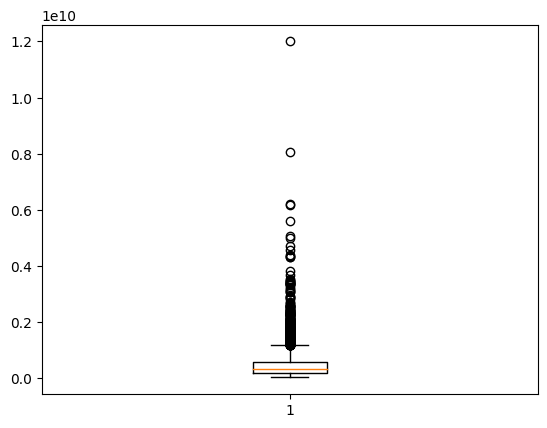

In [3]:
fixation_df = gaze_df[~gaze_df['fixation id'].isnull()]
fixation_duration = fixation_df.groupby(['fixation id', 'participant_folder'])['duration'].sum()
plt.boxplot(fixation_duration)
plt.show()